Connected to base (Python 3.11.5)

In [1]:
import pandas as pd
import mplfinance as mpf

df_1m = pd.read_csv('bund10yr_1m_240810.txt', delimiter='\t', encoding='euc-kr')
df_trade_log = pd.read_csv(f'bund10yr_trade_log_240810.tsv', delimiter='\t')

df_1m['시간']=pd.to_datetime(df_1m['시간'])
df_1m.set_index('시간', inplace=True)
df_1m.rename({'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'})

<ipython-input-1-83f2f1e5591f>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_1m['시간']=pd.to_datetime(df_1m['시간'])


DateParseError: Unknown datetime string format, unable to parse: 2024/08/10,05:00, at position 0

In [2]:
import pandas as pd
import mplfinance as mpf

df_1m = pd.read_csv('bund10yr_1m_240810.txt', delimiter='\t', encoding='euc-kr')
df_trade_log = pd.read_csv(f'bund10yr_trade_log_240810.tsv', delimiter='\t')

In [3]:
pd.to_datetime(df_1m['시간'])

<ipython-input-3-54af54e68a40>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_1m['시간'])


DateParseError: Unknown datetime string format, unable to parse: 2024/08/10,05:00, at position 0

In [4]:
pd.to_datetime(['2024/08/10,04:59'])

DateParseError: Unknown datetime string format, unable to parse: 2024/08/10,04:59, at position 0

In [5]:
pd.to_datetime(['2024/08/10 04:59'])

DatetimeIndex(['2024-08-10 04:59:00'], dtype='datetime64[ns]', freq=None)

In [6]:

df_1m.rename({'시간':'Date','시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'})

df_1m['Date']=pd.to_datetime(df_1m['Date'], format=format='%Y/%m/%d,%H:%M'))
df_1m.set_index('Date', inplace=True)


SyntaxError: unmatched ')' (<ipython-input-6-a6821ffbf2b1>, line 3)

In [7]:

df_1m.rename({'시간':'Date','시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'})

df_1m['Date']=pd.to_datetime(df_1m['Date'], format=format='%Y/%m/%d,%H:%M')
df_1m.set_index('Date', inplace=True)


SyntaxError: invalid syntax (<ipython-input-7-295b245977f9>, line 3)

In [8]:

df_1m.rename({'시간':'Date','시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'})

df_1m['Date']=pd.to_datetime(df_1m['Date'], format='%Y/%m/%d,%H:%M')
df_1m.set_index('Date', inplace=True)

KeyError: 'Date'

In [9]:
df_1m

,시간,시가,고가,저가,종가,5,10,20,60,120,거래량
0,"2024/08/10,05:00",134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
1,"2024/08/10,04:59",134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
2,"2024/08/10,04:58",134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
3,"2024/08/10,04:57",134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
4,"2024/08/10,04:56",134.55,134.55,134.55,134.55,134.54,134.53,134.52,134.51,134.51,46
...,...,...,...,...,...,...,...,...,...,...,...
20695,"2024/07/17,19:50",132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
20696,"2024/07/17,19:49",132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
20697,"2024/07/17,19:48",132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239
20698,"2024/07/17,19:47",132.45,132.46,132.44,132.44,52.98,26.49,13.24,4.41,2.21,700


In [10]:
df_1m.rename({'시간':'Date','시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'})


,시간,시가,고가,저가,종가,5,10,20,60,120,거래량
0,"2024/08/10,05:00",134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
1,"2024/08/10,04:59",134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
2,"2024/08/10,04:58",134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
3,"2024/08/10,04:57",134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
4,"2024/08/10,04:56",134.55,134.55,134.55,134.55,134.54,134.53,134.52,134.51,134.51,46
...,...,...,...,...,...,...,...,...,...,...,...
20695,"2024/07/17,19:50",132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
20696,"2024/07/17,19:49",132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
20697,"2024/07/17,19:48",132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239
20698,"2024/07/17,19:47",132.45,132.46,132.44,132.44,52.98,26.49,13.24,4.41,2.21,700


In [11]:
df_1m.rename({'시간':'Date','시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'}, inplace=True)


In [12]:
df1_m

NameError: name 'df1_m' is not defined

In [13]:
df_1m

,시간,시가,고가,저가,종가,5,10,20,60,120,거래량
0,"2024/08/10,05:00",134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
1,"2024/08/10,04:59",134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
2,"2024/08/10,04:58",134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
3,"2024/08/10,04:57",134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
4,"2024/08/10,04:56",134.55,134.55,134.55,134.55,134.54,134.53,134.52,134.51,134.51,46
...,...,...,...,...,...,...,...,...,...,...,...
20695,"2024/07/17,19:50",132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
20696,"2024/07/17,19:49",132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
20697,"2024/07/17,19:48",132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239
20698,"2024/07/17,19:47",132.45,132.46,132.44,132.44,52.98,26.49,13.24,4.41,2.21,700


In [14]:

df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    columns=['Date','Open','High','Low','Close','m5','m10','m20','m60','m120','Volume']
                    )

TypeError: read_csv() got an unexpected keyword argument 'columns'

In [15]:

df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    column=['Date','Open','High','Low','Close','m5','m10','m20','m60','m120','Volume']
                    )

TypeError: read_csv() got an unexpected keyword argument 'column'

In [16]:

df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    index_col=['Date','Open','High','Low','Close','m5','m10','m20','m60','m120','Volume']
                    )

ValueError: Index Date invalid

In [17]:

df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    names=['Date','Open','High','Low','Close','m5','m10','m20','m60','m120','Volume']
                    )

In [18]:
df_1m

,Date,Open,High,Low,Close,m5,m10,m20,m60,m120,Volume
0,시간,시가,고가,저가,종가,5.00,10.00,20.00,60.00,120.00,거래량
1,"2024/08/10,05:00",134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
2,"2024/08/10,04:59",134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
3,"2024/08/10,04:58",134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
4,"2024/08/10,04:57",134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
...,...,...,...,...,...,...,...,...,...,...,...
20696,"2024/07/17,19:50",132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
20697,"2024/07/17,19:49",132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
20698,"2024/07/17,19:48",132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239
20699,"2024/07/17,19:47",132.45,132.46,132.44,132.44,52.98,26.49,13.24,4.41,2.21,700


In [19]:

df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    names=['Date','Open','High','Low','Close',
                           'm5','m10','m20','m60','m120','Volume'],
                    skiprows=1)


In [20]:
df_1m

,Date,Open,High,Low,Close,m5,m10,m20,m60,m120,Volume
0,"2024/08/10,05:00",134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
1,"2024/08/10,04:59",134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
2,"2024/08/10,04:58",134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
3,"2024/08/10,04:57",134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
4,"2024/08/10,04:56",134.55,134.55,134.55,134.55,134.54,134.53,134.52,134.51,134.51,46
...,...,...,...,...,...,...,...,...,...,...,...
20695,"2024/07/17,19:50",132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
20696,"2024/07/17,19:49",132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
20697,"2024/07/17,19:48",132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239
20698,"2024/07/17,19:47",132.45,132.46,132.44,132.44,52.98,26.49,13.24,4.41,2.21,700


In [21]:
df_1m['Date']=pd.to_datetime(df_1m['Date'], format='%Y/%m/%d,%H:%M')


In [22]:
df_1m

,Date,Open,High,Low,Close,m5,m10,m20,m60,m120,Volume
0,2024-08-10 05:00:00,134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
1,2024-08-10 04:59:00,134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
2,2024-08-10 04:58:00,134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
3,2024-08-10 04:57:00,134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
4,2024-08-10 04:56:00,134.55,134.55,134.55,134.55,134.54,134.53,134.52,134.51,134.51,46
...,...,...,...,...,...,...,...,...,...,...,...
20695,2024-07-17 19:50:00,132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
20696,2024-07-17 19:49:00,132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
20697,2024-07-17 19:48:00,132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239
20698,2024-07-17 19:47:00,132.45,132.46,132.44,132.44,52.98,26.49,13.24,4.41,2.21,700


In [23]:
df_1m.set_index('Date')

,Open,High,Low,Close,m5,m10,m20,m60,m120,Volume
Date,,,,,,,,,,
2024-08-10 05:00:00,134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
2024-08-10 04:59:00,134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
2024-08-10 04:58:00,134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
2024-08-10 04:57:00,134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
2024-08-10 04:56:00,134.55,134.55,134.55,134.55,134.54,134.53,134.52,134.51,134.51,46
...,...,...,...,...,...,...,...,...,...,...
2024-07-17 19:50:00,132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
2024-07-17 19:49:00,132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
2024-07-17 19:48:00,132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239


In [24]:
df_trade_log = pd.read_csv(f'bund10yr_trade_log_240810.tsv', delimiter='\t')



In [25]:
df_trade_log

,청산일자,종목코드,수량,진입구분,진입가격,청산구분,청산가격,청산손익,수수료,순손익,순손익(KRW),진입일시,청산일시,손익통화
0,2024-08-09,RXU24,35,매도,134.20,매수,134.58,"-13,300.00",105,"-13,405.00","-20,164,337",2024-08-09 16:36,2024-08-10 0:12,EUR
1,2024-08-09,RXU24,35,매도,134.24,매수,134.22,700,105,595,"895,023",2024-08-09 16:32,2024-08-09 16:35,EUR
2,2024-08-09,RXU24,35,매도,134.29,매수,134.28,350,105,245,"368,539",2024-08-09 16:04,2024-08-09 16:28,EUR
3,2024-08-09,RXU24,35,매도,134.23,매수,134.20,"1,050.00",105,945,"1,421,507",2024-08-09 15:42,2024-08-09 15:58,EUR
4,2024-08-09,RXU24,25,매도,134.35,매수,134.31,"1,000.00",75,925,"1,391,422",2024-08-09 14:25,2024-08-09 14:44,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2024-07-01,RXU24,1,매도,130.87,매수,130.84,30,4,26,"38,593",2024-07-01 17:04,2024-07-01 17:09,EUR
464,2024-07-01,RXU24,1,매도,130.90,매수,130.87,30,4,26,"38,593",2024-07-01 16:59,2024-07-01 17:02,EUR
465,2024-07-01,RXU24,1,매수,131.12,매도,131.15,30,4,26,"38,593",2024-07-01 15:50,2024-07-01 15:50,EUR
466,2024-07-01,RXU24,1,매수,131.12,매도,131.15,30,4,26,"38,593",2024-07-01 15:33,2024-07-01 15:33,EUR


In [26]:

df_trade_log['진입일시'] = pd.datetime(df_trade_log['진입일시'], format='%Y/%m/%d,%H:%M')
df_trade_log['청산일시'] = pd.datetime(df_trade_log['청산일시'], format='%Y/%m/%d,%H:%M')


AttributeError: module 'pandas' has no attribute 'datetime'

In [27]:
df_trade_log['진입일시'] = pd.to_datetime(df_trade_log['진입일시'], format='%Y/%m/%d,%H:%M')
df_trade_log['청산일시'] = pd.to_datetime(df_trade_log['청산일시'], format='%Y/%m/%d,%H:%M')


ValueError: time data "2024-08-09 16:36" doesn't match format "%Y/%m/%d,%H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [28]:

df_trade_log['진입일시'] = pd.to_datetime(df_trade_log['진입일시'], format='%Y/%m/%d %H:%M')
df_trade_log['청산일시'] = pd.to_datetime(df_trade_log['청산일시'], format='%Y/%m/%d %H:%M')


ValueError: time data "2024-08-09 16:36" doesn't match format "%Y/%m/%d %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [29]:

df_trade_log['진입일시'] = pd.to_datetime(df_trade_log['진입일시'], format='%Y-%m-%d %H:%M')
df_trade_log['청산일시'] = pd.to_datetime(df_trade_log['청산일시'], format='%Y-%m-%d %H:%M')


In [30]:
df_trade_log

,청산일자,종목코드,수량,진입구분,진입가격,청산구분,청산가격,청산손익,수수료,순손익,순손익(KRW),진입일시,청산일시,손익통화
0,2024-08-09,RXU24,35,매도,134.20,매수,134.58,"-13,300.00",105,"-13,405.00","-20,164,337",2024-08-09 16:36:00,2024-08-10 00:12:00,EUR
1,2024-08-09,RXU24,35,매도,134.24,매수,134.22,700,105,595,"895,023",2024-08-09 16:32:00,2024-08-09 16:35:00,EUR
2,2024-08-09,RXU24,35,매도,134.29,매수,134.28,350,105,245,"368,539",2024-08-09 16:04:00,2024-08-09 16:28:00,EUR
3,2024-08-09,RXU24,35,매도,134.23,매수,134.20,"1,050.00",105,945,"1,421,507",2024-08-09 15:42:00,2024-08-09 15:58:00,EUR
4,2024-08-09,RXU24,25,매도,134.35,매수,134.31,"1,000.00",75,925,"1,391,422",2024-08-09 14:25:00,2024-08-09 14:44:00,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2024-07-01,RXU24,1,매도,130.87,매수,130.84,30,4,26,"38,593",2024-07-01 17:04:00,2024-07-01 17:09:00,EUR
464,2024-07-01,RXU24,1,매도,130.90,매수,130.87,30,4,26,"38,593",2024-07-01 16:59:00,2024-07-01 17:02:00,EUR
465,2024-07-01,RXU24,1,매수,131.12,매도,131.15,30,4,26,"38,593",2024-07-01 15:50:00,2024-07-01 15:50:00,EUR
466,2024-07-01,RXU24,1,매수,131.12,매도,131.15,30,4,26,"38,593",2024-07-01 15:33:00,2024-07-01 15:33:00,EUR


In [31]:
mpf.plot(df_1m, type='candle', style='charles', title='bund10yr', ylabel='Price')


TypeError: Expect data.index as DatetimeIndex

In [32]:
df_1m

,Date,Open,High,Low,Close,m5,m10,m20,m60,m120,Volume
0,2024-08-10 05:00:00,134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
1,2024-08-10 04:59:00,134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
2,2024-08-10 04:58:00,134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
3,2024-08-10 04:57:00,134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
4,2024-08-10 04:56:00,134.55,134.55,134.55,134.55,134.54,134.53,134.52,134.51,134.51,46
...,...,...,...,...,...,...,...,...,...,...,...
20695,2024-07-17 19:50:00,132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
20696,2024-07-17 19:49:00,132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
20697,2024-07-17 19:48:00,132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239
20698,2024-07-17 19:47:00,132.45,132.46,132.44,132.44,52.98,26.49,13.24,4.41,2.21,700


In [33]:

df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    names=['Date','Open','High','Low','Close',
                           'm5','m10','m20','m60','m120','Volume'],
                    skiprows=1)

df_1m['Date']=pd.to_datetime(df_1m['Date'], format='%Y/%m/%d,%H:%M')
df_1m.set_index('Date', inplace=True)

df_trade_log = pd.read_csv(f'bund10yr_trade_log_240810.tsv', delimiter='\t')

df_trade_log['진입일시'] = pd.to_datetime(df_trade_log['진입일시'], format='%Y-%m-%d %H:%M')
df_trade_log['청산일시'] = pd.to_datetime(df_trade_log['청산일시'], format='%Y-%m-%d %H:%M')

# draw candle
mpf.plot(df_1m, type='candle', style='charles', title='bund10yr', ylabel='Price')


ValueError: Data for column "Volume" must be ALL float or int.

In [34]:

# draw candle
mpf.plot(df_1m, type='candle', style='charles', title='bund10yr', ylabel='Price')


ValueError: Data for column "Volume" must be ALL float or int.

In [35]:
df_1m

,Open,High,Low,Close,m5,m10,m20,m60,m120,Volume
Date,,,,,,,,,,
2024-08-10 05:00:00,134.55,134.56,134.53,134.54,134.55,134.54,134.53,134.51,134.51,291
2024-08-10 04:59:00,134.55,134.55,134.55,134.55,134.55,134.54,134.53,134.51,134.51,47
2024-08-10 04:58:00,134.54,134.55,134.54,134.55,134.54,134.54,134.53,134.51,134.51,158
2024-08-10 04:57:00,134.54,134.55,134.53,134.54,134.54,134.53,134.53,134.51,134.51,78
2024-08-10 04:56:00,134.55,134.55,134.55,134.55,134.54,134.53,134.52,134.51,134.51,46
...,...,...,...,...,...,...,...,...,...,...
2024-07-17 19:50:00,132.43,132.45,132.43,132.44,132.44,66.22,33.11,11.04,5.52,"2,123"
2024-07-17 19:49:00,132.44,132.45,132.43,132.43,105.95,52.98,26.49,8.83,4.41,802
2024-07-17 19:48:00,132.44,132.45,132.44,132.44,79.47,39.73,19.87,6.62,3.31,239


In [36]:
df_1m.dtypes

Open      float64
High      float64
Low       float64
Close     float64
m5        float64
m10       float64
m20       float64
m60       float64
m120      float64
Volume     object
dtype: object

In [37]:
df_1m['Volume']

Date
2024-08-10 05:00:00      291
2024-08-10 04:59:00       47
2024-08-10 04:58:00      158
2024-08-10 04:57:00       78
2024-08-10 04:56:00       46
                       ...  
2024-07-17 19:50:00    2,123
2024-07-17 19:49:00      802
2024-07-17 19:48:00      239
2024-07-17 19:47:00      700
2024-07-17 19:46:00      728
Name: Volume, Length: 20700, dtype: object

In [38]:
df_1m['Volume'].astype(int)

ValueError: invalid literal for int() with base 10: '2,623'

In [39]:

df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    names=['Date','Open','High','Low','Close',
                           'm5','m10','m20','m60','m120','Volume'],
                    thousands=','
                    skiprows=1)

df_1m['Date']=pd.to_datetime(df_1m['Date'], format='%Y/%m/%d,%H:%M')
df_1m.set_index('Date', inplace=True)

df_trade_log = pd.read_csv(f'bund10yr_trade_log_240810.tsv', 
                           delimiter='\t', 
                           thousands=',')

df_trade_log['진입일시'] = pd.to_datetime(df_trade_log['진입일시'], format='%Y-%m-%d %H:%M')
df_trade_log['청산일시'] = pd.to_datetime(df_trade_log['청산일시'], format='%Y-%m-%d %H:%M')

# draw candle
mpf.plot(df_1m, type='candle', style='charles', title='bund10yr', ylabel='Price')


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-39-ad8e6c500ba2>, line 6)

c:\Users\taeil\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


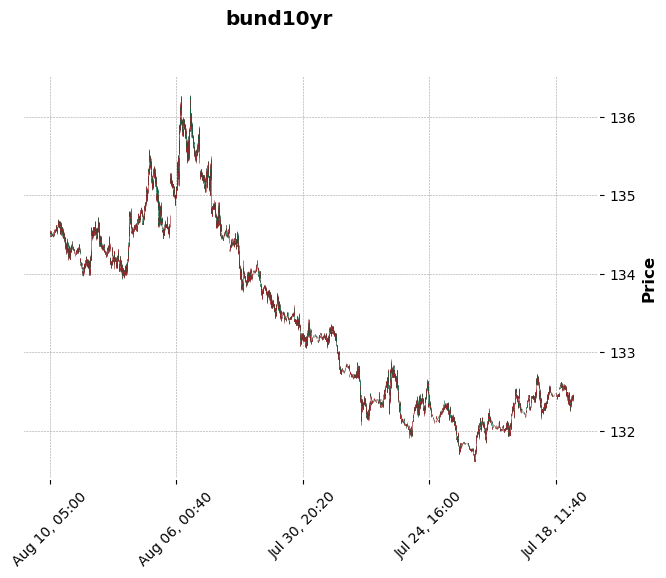

In [40]:

df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    names=['Date','Open','High','Low','Close',
                           'm5','m10','m20','m60','m120','Volume'],
                    thousands=',',
                    skiprows=1)

df_1m['Date']=pd.to_datetime(df_1m['Date'], format='%Y/%m/%d,%H:%M')
df_1m.set_index('Date', inplace=True)

df_trade_log = pd.read_csv(f'bund10yr_trade_log_240810.tsv', 
                           delimiter='\t', 
                           thousands=',')

df_trade_log['진입일시'] = pd.to_datetime(df_trade_log['진입일시'], format='%Y-%m-%d %H:%M')
df_trade_log['청산일시'] = pd.to_datetime(df_trade_log['청산일시'], format='%Y-%m-%d %H:%M')

# draw candle
mpf.plot(df_1m, type='candle', style='charles', title='bund10yr', ylabel='Price')


c:\Users\taeil\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


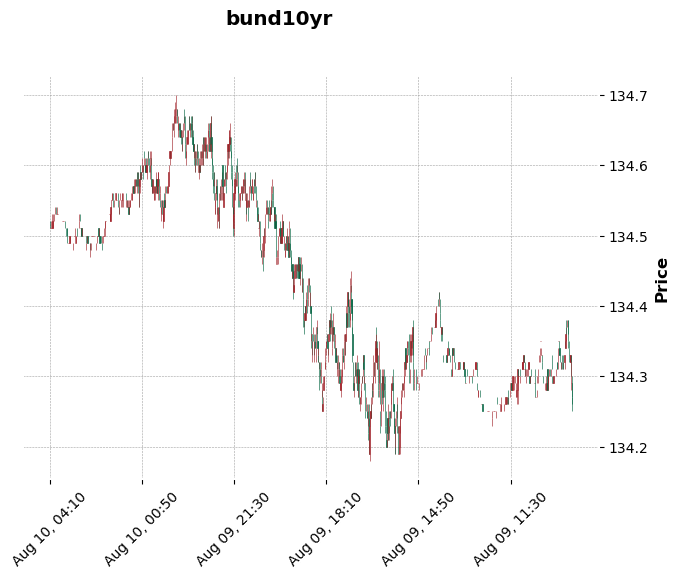

In [9]:

df_1m = df_1m.sort_index(ascending=True)

# draw candle
start = '2024-08-09 09:15'
enddt = '2024-08-10 04:10'
flt = (df_1m.index >= start) & (df_1m.index <= enddt)
mpf.plot(df_1m.loc[flt], type='candle', style='charles', title='bund10yr', ylabel='Price')
